<a href="https://colab.research.google.com/github/AntoonGoderis/Deep-Learning/blob/Antoon/assignment_2_bayes_random.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import pandas as pd
import cv2

import os
import json
import ast

import numpy as np
import pandas as pd
import cv2
from scipy.optimize import curve_fit

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report

import tensorflow as tf
from tensorflow.keras import layers, regularizers
from tensorflow.keras.layers import LeakyReLU
from tensorflow.keras.optimizers import SGD, AdamW

!pip install keras-tuner
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Flatten, Input
from keras.regularizers import l2
from keras.utils import to_categorical

import keras_tuner as kt

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import zipfile

from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.applications.efficientnet import preprocess_input as pi_efficient
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input as pi_resnet

from tensorflow.keras import layers, models, preprocessing






   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 5.4 MB/s eta 0:00:00


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import zipfile

# Replace 'path/to/your_file.zip' with the path to your zip file in Google Drive
zip_file_path = '/content/drive/My Drive/Assign2/training_data.zip'
extract_path = '/content/simpsons-mnist-master/dataset/rgb/'

with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

zip_file_path = '/content/drive/My Drive/Assign2/test_data.zip'
extract_path = '/content/simpsons-mnist-master/dataset/rgb/'

with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

Mounted at /content/drive


In [ ]:
base_dir = os.getcwd()

train_path = os.path.join(base_dir, "simpsons-mnist-master", "dataset", "rgb", "train")
test_path = os.path.join(base_dir, "simpsons-mnist-master", "dataset", "rgb", "test")
#test_rotated_path = os.path.join(base_dir, "simpsons-mnist-master", "dataset", "rgb", "test_rotated")
#test_zoomed_in_path = os.path.join(base_dir, "simpsons-mnist-master", "dataset", "rgb", "test_zoomed_in")
#test_zoomed_out_path = os.path.join(base_dir, "simpsons-mnist-master", "dataset", "rgb", "test_zoomed_out")

image_data = []
test_data = []
test_r_data = []
test_zi_data = []
test_zo_data = []

for class_name in os.listdir(train_path):

    class_path = os.path.join(train_path, class_name)

    if os.path.isdir(class_path):
        for img_name in os.listdir(class_path):
            image_data.append((os.path.join(class_path, img_name), class_name))

df_train = pd.DataFrame(image_data, columns=["image_path", "label"])
print(df_train.head())

for class_name in os.listdir(test_path):

    class_path = os.path.join(test_path, class_name)

    if os.path.isdir(class_path):
        for img_name in os.listdir(class_path):
            test_data.append((os.path.join(class_path, img_name), class_name))


df_test = pd.DataFrame(test_data, columns=["image_path", "label"])
print(df_test.head())

"""
for class_name in os.listdir(test_rotated_path):

    class_path = os.path.join(test_rotated_path, class_name)

    if os.path.isdir(class_path):
        for img_name in os.listdir(class_path):
            test_r_data.append((os.path.join(class_path, img_name), class_name))

df_test_r = pd.DataFrame(test_r_data, columns=["image_path", "label"])
print(df_test_r.head())

for class_name in os.listdir(test_zoomed_in_path):

    class_path = os.path.join(test_zoomed_in_path, class_name)

    if os.path.isdir(class_path):
        for img_name in os.listdir(class_path):
            test_zi_data.append((os.path.join(class_path, img_name), class_name))

df_test_zi = pd.DataFrame(test_zi_data, columns=["image_path", "label"])
print(df_test_zi.head())

for class_name in os.listdir(test_zoomed_out_path):

    class_path = os.path.join(test_zoomed_out_path, class_name)

    if os.path.isdir(class_path):
        for img_name in os.listdir(class_path):
            test_zo_data.append((os.path.join(class_path, img_name), class_name))

df_test_zo = pd.DataFrame(test_zo_data, columns=["image_path", "label"])
print(df_test_zo.head())
"""

                                          image_path              label
0  /content/simpsons-mnist-master/dataset/rgb/tra...  principal_skinner
1  /content/simpsons-mnist-master/dataset/rgb/tra...  principal_skinner
2  /content/simpsons-mnist-master/dataset/rgb/tra...  principal_skinner
3  /content/simpsons-mnist-master/dataset/rgb/tra...  principal_skinner
4  /content/simpsons-mnist-master/dataset/rgb/tra...  principal_skinner
                                          image_path              label
0  /content/simpsons-mnist-master/dataset/rgb/tes...  principal_skinner
1  /content/simpsons-mnist-master/dataset/rgb/tes...  principal_skinner
2  /content/simpsons-mnist-master/dataset/rgb/tes...  principal_skinner
3  /content/simpsons-mnist-master/dataset/rgb/tes...  principal_skinner
4  /content/simpsons-mnist-master/dataset/rgb/tes...  principal_skinner


'\nfor class_name in os.listdir(test_rotated_path):\n\n    class_path = os.path.join(test_rotated_path, class_name)\n\n    if os.path.isdir(class_path):\n        for img_name in os.listdir(class_path):\n            test_r_data.append((os.path.join(class_path, img_name), class_name))\n\ndf_test_r = pd.DataFrame(test_r_data, columns=["image_path", "label"])\nprint(df_test_r.head())\n\nfor class_name in os.listdir(test_zoomed_in_path):\n\n    class_path = os.path.join(test_zoomed_in_path, class_name)\n\n    if os.path.isdir(class_path):\n        for img_name in os.listdir(class_path):\n            test_zi_data.append((os.path.join(class_path, img_name), class_name))\n\ndf_test_zi = pd.DataFrame(test_zi_data, columns=["image_path", "label"])\nprint(df_test_zi.head())\n\nfor class_name in os.listdir(test_zoomed_out_path):\n\n    class_path = os.path.join(test_zoomed_out_path, class_name)\n\n    if os.path.isdir(class_path):\n        for img_name in os.listdir(class_path):\n            test_

In [ ]:
import cv2

def load_image(img_path):
    img = cv2.imread(img_path)
    if img is None:
        print(f"Error: Could not load image at {img_path}")
        return None
    img = img / 255.0
    return img

df_train["image_array"] = df_train["image_path"].apply(lambda x: load_image(x))
df_test["image_array"] = df_test["image_path"].apply(lambda x: load_image(x))



"""
def load_image(img_path):
    img = cv2.imread(img_path)
    img = img / 255.0
    return img


df_train["image_array"] = df_train["image_path"].apply(lambda x: load_image(x))

df_test["image_array"] = df_test["image_path"].apply(lambda x: load_image(x))

df_test_r["image_array"] = df_test_r["image_path"].apply(lambda x: load_image(x))

df_test_zi["image_array"] = df_test_zi["image_path"].apply(lambda x: load_image(x))

df_test_zo["image_array"] = df_test_zo["image_path"].apply(lambda x: load_image(x))
"""

sample_img = df_train["image_array"][0]
print(sample_img.shape)

(28, 28, 3)


In [ ]:
num_classes = df_train.label.nunique()
print(num_classes)

10


In [ ]:
label_encoder = LabelEncoder()
df_train["label_encoded"] = label_encoder.fit_transform(df_train["label"])
df_test["label_encoded"] = label_encoder.transform(df_test["label"])
"""
df_test_r["label_encoded"] = label_encoder.transform(df_test_r["label"])
df_test_zi["label_encoded"] = label_encoder.transform(df_test_zi["label"])
df_test_zo["label_encoded"] = label_encoder.transform(df_test_zo["label"])
"""


X_train_valid = np.stack(df_train["image_array"].values)


y_train_valid = to_categorical(df_train["label_encoded"], num_classes=num_classes)

X_train, X_valid, y_train, y_valid = train_test_split(X_train_valid, y_train_valid, test_size=0.3, random_state=42)

X_test = np.stack(df_test["image_array"].values)
y_test = to_categorical(df_test["label_encoded"], num_classes=num_classes)
"""
X_test_r = np.stack(df_test_r["image_array"].values)
y_test_r = to_categorical(df_test_r["label_encoded"], num_classes=num_classes)

X_test_zi = np.stack(df_test_zi["image_array"].values)
y_test_zi = to_categorical(df_test_zi["label_encoded"], num_classes=num_classes)

X_test_zo = np.stack(df_test_zo["image_array"].values)
y_test_zo = to_categorical(df_test_zo["label_encoded"], num_classes=num_classes)
"""

print(X_train_valid.shape)
print(y_train_valid.shape)



(8000, 28, 28, 3)
(8000, 10)


In [ ]:
import itertools
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Conv2D, LeakyReLU, Flatten, Dense
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import AdamW

num_layers_options = list(range(3, 4))
neurons_options = list(range(16, 129, 16))
regs = [0.0005, 0.001, 0.0015, 0.0025, 0.005, 0.01]

hyperparameter_combinations = list(itertools.product(num_layers_options, neurons_options, regs))

best_model = None
best_val_acc = 0
best_hyperparams = None

results_G = []

for num_layers, neurons, reg in hyperparameter_combinations:
    print(f"\nTesting Model with {num_layers} layers, {neurons} neurons, L2={reg}")

    model = Sequential()
    model.add(Input(shape=(28, 28, 3)))

    for _ in range(num_layers):
        model.add(Conv2D(filters=neurons, kernel_size=(3,3), kernel_regularizer=l2(reg)))
        model.add(LeakyReLU())

    model.add(Flatten())
    model.add(Dense(10, activation="softmax"))

    optimizer = AdamW()
    model.compile(optimizer=optimizer, loss="categorical_crossentropy", metrics=["accuracy"])

    early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=30, restore_best_weights=True, verbose=0)

    history = model.fit(
        X_train, y_train,
        validation_data=(X_valid, y_valid),
        epochs=300,
        batch_size=64,
        callbacks=[early_stopping],
        verbose=0
    )

    best_epoch = np.argmax(history.history['val_accuracy'])
    train_acc = history.history['accuracy'][best_epoch]
    val_acc = history.history['val_accuracy'][best_epoch]
    print(f"Model Validation Accuracy: {val_acc:.4f}")

    results_G.append({
        "num_layers": num_layers,
        "neurons": neurons,
        "l2_reg": reg,
        "train_acc": train_acc,
        "val_acc": val_acc
    })

    if val_acc > best_val_acc:
        best_val_acc = val_acc
        best_model = model
        best_hyperparams = (num_layers, neurons, reg)

df_results_G = pd.DataFrame(results_G)

if best_hyperparams is not None:
    print("\nBest Model Found:")
    print(f"Layers: {best_hyperparams[0]}, Neurons: {best_hyperparams[1]}, L2 Regularization: {best_hyperparams[2]}")
    print(f"Best Validation Accuracy: {best_val_acc:.4f}")
else:
    print("No model achieved a validation accuracy higher than the initial value.")



Testing Model with 3 layers, 16 neurons, L2=0.0005
Model Validation Accuracy: 0.5654

Testing Model with 3 layers, 16 neurons, L2=0.001
Model Validation Accuracy: 0.5700

Testing Model with 3 layers, 16 neurons, L2=0.0015
Model Validation Accuracy: 0.5821

Testing Model with 3 layers, 16 neurons, L2=0.0025
Model Validation Accuracy: 0.5788

Testing Model with 3 layers, 16 neurons, L2=0.005
Model Validation Accuracy: 0.5738

Testing Model with 3 layers, 16 neurons, L2=0.01
Model Validation Accuracy: 0.5758

Testing Model with 3 layers, 32 neurons, L2=0.0005
Model Validation Accuracy: 0.5979

Testing Model with 3 layers, 32 neurons, L2=0.001
Model Validation Accuracy: 0.6092

Testing Model with 3 layers, 32 neurons, L2=0.0015
Model Validation Accuracy: 0.6021

Testing Model with 3 layers, 32 neurons, L2=0.0025
Model Validation Accuracy: 0.5979

Testing Model with 3 layers, 32 neurons, L2=0.005
Model Validation Accuracy: 0.6012

Testing Model with 3 layers, 32 neurons, L2=0.01
Model Vali

In [ ]:
# Save the DataFrame to a CSV file in your Google Drive
df_results_G.to_csv('/content/drive/My Drive/results34.csv', index=False)

print("Results saved to Google Drive at /content/drive/My Drive/results34.csv")

In [ ]:



# Preprocess all images of entire dataset
X_train = pi_resnet(X_train)
X_valid = pi_resnet(X_valid)

X_train_resized = tf.image.resize(X_train, (32, 32))
X_valid_resized = tf.image.resize(X_valid, (32, 32))

# Import ResNet50 for transfer learning
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(32, 32, 3))
base_model.trainable = False  # Freeze base model

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [ ]:

input_shape = (32, 32, 3)

data_augmentation = models.Sequential([
    layers.InputLayer(input_shape=input_shape),
    layers.RandomFlip('horizontal'),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
    layers.RandomTranslation(0.1, 0.1),
    #layers.RandomContrast(0.1),
])

custom_cnn = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=input_shape),
    layers.BatchNormalization(),

    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),

    layers.Conv2D(3, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
])


model = models.Sequential([
    data_augmentation,
    custom_cnn,
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(512),
    layers.LeakyReLU(alpha=0.3),
    layers.Dropout(0.4),
    layers.Dense(256),
    layers.LeakyReLU(alpha=0.3),
    layers.Dropout(0.3),
    layers.Dense(128),
    layers.LeakyReLU(alpha=0.3),
    layers.Dropout(0.2),
    layers.Dense(num_classes, activation='softmax')
])




model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])



/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


In [ ]:
print(f"X_train_resized shape: {X_train_resized.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_valid_resized shape: {X_valid_resized.shape}")
print(f"y_valid shape: {y_valid.shape}")


X_train_resized shape: (5600, 32, 32, 3)
y_train shape: (5600, 10)
X_valid_resized shape: (2400, 32, 32, 3)
y_valid shape: (2400, 10)


In [ ]:

model.summary()


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ sequential (Sequential)              │ (None, 32, 32, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ sequential_1 (Sequential)            │ (None, 32, 32, 3)           │          21,519 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ resnet50 (Functional)                │ (None, 1, 1, 2048)          │      23,587,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 2048)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │       1,049,088 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu (LeakyReLU)              │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_1 (LeakyReLU)            │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_2 (LeakyReLU)            │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 24,823,833 (94.70 MB)

 Trainable params: 1,235,923 (4.71 MB)

 Non-trainable params: 23,587,910 (89.98 MB)

In [ ]:
history = model.fit(X_train_resized, y_train,
                    validation_data=(X_valid_resized, y_valid),
                    epochs=1000, batch_size=64)

Epoch 1/1000
88/88 ━━━━━━━━━━━━━━━━━━━━ 343s 4s/step - accuracy: 0.1077 - loss: 2.5933 - val_accuracy: 0.0983 - val_loss: 2.3527
Epoch 2/1000
42/88 ━━━━━━━━━━━━━━━━━━━━ 2:38 3s/step - accuracy: 0.1028 - loss: 2.3637

KeyboardInterrupt: 

In [ ]:
model.save("my_model.h5")  # Saves in HDF5 format


c:\Users\Henri\python\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


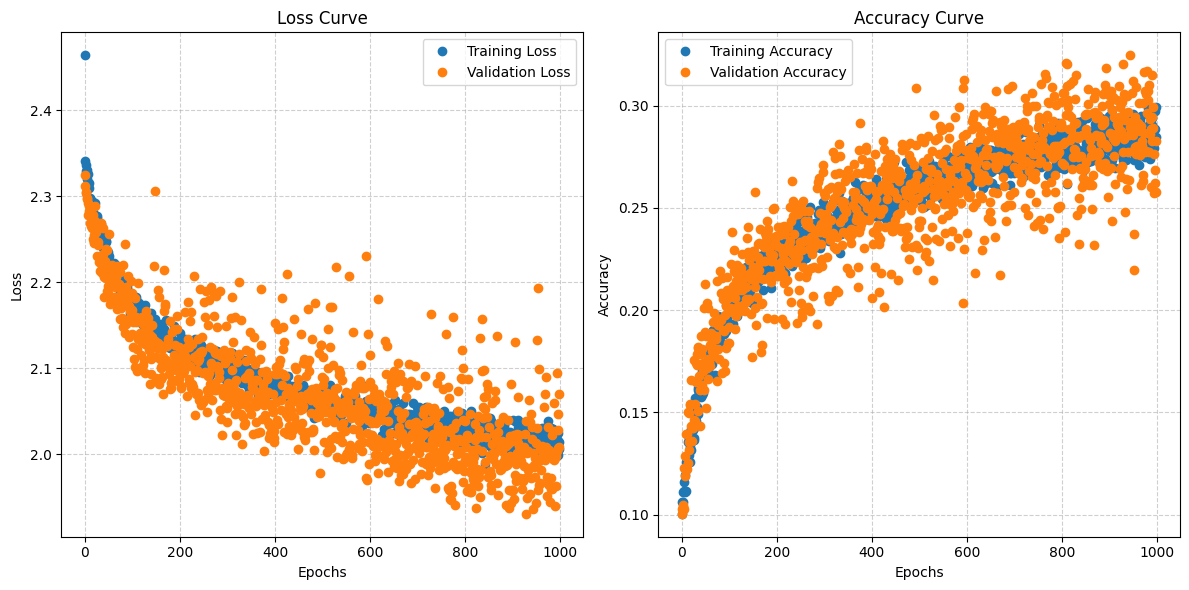

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

# Loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], marker='o', linestyle='none', label='Training Loss')
if 'val_loss' in history.history:
    plt.plot(history.history['val_loss'], marker='o', linestyle='none', label='Validation Loss')
plt.title('Loss Curve')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)

# Accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], marker='o', linestyle='none', label='Training Accuracy')
if 'val_accuracy' in history.history:
    plt.plot(history.history['val_accuracy'], marker='o', linestyle='none', label='Validation Accuracy')
plt.title('Accuracy Curve')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()
